In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
import seaborn as sns


In [58]:
batter_file_path = '../data/batter_stats_2017.csv'
batter = pd.read_csv(batter_file_path)
batter.columns
batter["BABIP"]=pd.to_numeric(batter["BABIP"],errors='coerce')

In [35]:
pd.options.mode.chained_assignment = None

In [36]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df



In [37]:
scale_columns=['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR','연봉(2017)']
batter_df=standard_scaling(batter,scale_columns)

In [38]:
batter_df= batter_df.rename(columns={'연봉(2018)':'y'})
batter_df.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.101238,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.460774,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.679622,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.859390,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.554566,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,150000,1.484672


In [39]:
team_encoding = pd.get_dummies(batter_df['팀명'])
batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)


In [46]:
batter_df=batter_df.fillna(0)

In [47]:
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=19)

In [48]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [50]:
print(lr.coef_)

[    464.82750273   -2766.31649254   -2852.15015407    2717.72271143
   -5879.31556002  -15075.78849408   -1015.83305835    4839.59487455
   43386.91449306    2357.47918831   -1131.71784009     959.9995388
     890.75328367    -726.00779155    9221.98353042   17471.81650339
    -610.96720293   -3419.70105104    -690.205892     26384.83221446
   -7515.64360438  -23933.43560307 -114142.22900103  102782.58610014
    -283.40641176   -1422.2675627     1425.84078249    3531.36737979]


In [49]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     41.64
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.62e-38
Time:                        17:33:15   Log-Likelihood:                -1182.2
No. Observations:                 114   AIC:                             2418.
Df Residuals:                      87   BIC:                             2492.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.918e+04    795.503     24.116      0.000    1.76e+04    2.08e+04
BABIP        464.8275   1852.784      0.251      0.802   -3217.782    4147.437
KIA         -847.9014   3291.768     -0.258      0.797   -7390.646    5694.843
KT          -933.7351   2816.789     -0.331      0.741   -6532.409    4664.939
LG          4636.1378   2673.606      1.734      0.086    -677.945    9950.220
NC         -3960.9005   2478.190     -1.598      0.114   -8886.571     964.770
OPS        -1.508e+04   1.24e+04     -1.213      0.228   -3.98e+04    9620.052
SK           902.5820   2586.013      0.349      0.728   -4237.398    6042.562
WAR         4839.5949   4332.126      1.117      0.267   -3770.974    1.35e+04
wOBA        4.339e+04   3.76e+04      1.154      0.252   -3.13e+04    1.18e+05
경기          2357.4792   3562.206      0.662      0.510   -4722.791    9437.749
넥센           786.6972   2378.750      0.331      0.742   -3941.327    5514.721
도루           959.9995   1320.327      0.727      0.469   -1664.293    3584.292
두산          2809.1683   3415.947      0.822      0.413   -3980.396    9598.733
득점          -726.0078   4824.869     -0.150      0.881   -1.03e+04    8863.941
롯데          1.114e+04   3021.387      3.687      0.000    5135.065    1.71e+04
볼넷          1.747e+04   4896.488      3.568      0.001    7739.517    2.72e+04
삼성          1307.4479   2439.089      0.536      0.593   -3540.506    6155.402
삼진         -3419.7011   2928.942     -1.168      0.246   -9241.291    2401.889
안타          -690.2059   1.49e+04     -0.046      0.963   -3.02e+04    2.89e+04
연봉(2017)    2.638e+04   1595.409     16.538      0.000    2.32e+04    2.96e+04
장타율        -7515.6436   7585.859     -0.991      0.325   -2.26e+04    7562.072
출루율        -2.393e+04   1.89e+04     -1.267      0.209   -6.15e+04    1.36e+04
타석         -1.141e+05   5.06e+04     -2.255      0.027   -2.15e+05   -1.35e+04
타수          1.028e+05   5.25e+04      1.959      0.053   -1513.880    2.07e+05
타율          -283.4064   5244.068     -0.054      0.957   -1.07e+04    1.01e+04
타점         -1422.2676   5027.832     -0.283      0.778   -1.14e+04    8571.094
한화          3344.2558   2788.779      1.199      0.234   -2198.743    8887.255
홈런          3531.3674   4139.194      0.853      0.396   -4695.729    1.18e+04
==============================================================================
Omnibus:                       53.687   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.331
Skew:                           1.167   Prob(JB):                    1.93e-125
Kurtosis:                      13.745   Cond. No.                     4.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [80]:
predict_2018_salary=lr.predict(X)

In [81]:
batter_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [82]:
batter = pd.read_csv(batter_file_path)
batter = batter[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = batter_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(batter, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']
# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,3,손아섭,150000,76907.395216,65000
1,4,러프,140000,116452.751204,110000
2,9,번즈,73000,64129.593274,60000
3,10,스크럭스,70000,89130.380895,80000
4,17,양의지,60000,53626.594587,48000
5,20,손시헌,50000,45899.910431,40000
6,21,로맥,50000,34814.082359,30000
7,23,나성범,43000,50864.382483,35000
8,25,이용규,40000,81231.585952,90000
9,28,김주찬,40000,62540.161692,60000


<Axes: xlabel='선수명'>

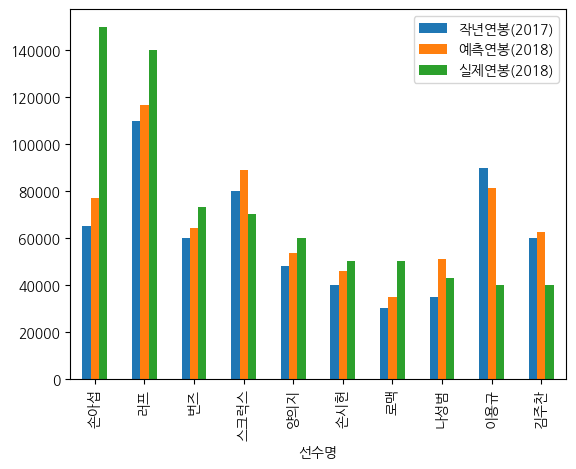

In [83]:
mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")

In [84]:
batter_file_path = '../data/batter_stats_2017.csv'
batter = pd.read_csv(batter_file_path)
batter.columns
batter["BABIP"]=pd.to_numeric(batter["BABIP"],errors='coerce')

In [85]:
pd.options.mode.chained_assignment = None

In [86]:
scale_columns=['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR','연봉(2017)']
batter_df=standard_scaling(batter,scale_columns)

In [87]:
batter_df= batter_df.rename(columns={'연봉(2018)':'y'})
batter_df.head(5)


,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.101238,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.460774,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.679622,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.859390,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.554566,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,150000,1.484672


In [88]:
team_encoding = pd.get_dummies(batter_df['팀명'])
batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)

In [89]:
batter_df=batter_df.fillna(0)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=19)

In [92]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [93]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(3)


,VIF Factor,features
0,5.228,BABIP
1,1.142,KIA
2,1.106,KT
3,1.196,LG
4,1.056,NC
5,inf,OPS
6,1.231,SK
7,21.509,WAR
8,2177.764,wOBA
9,14.454,경기


In [94]:
X=batter_df[['홈런','타율','WAR','타점','연봉(2017)']]
y=batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [95]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [96]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     310.7
Date:                Mon, 15 May 2023   Prob (F-statistic):           6.46e-76
Time:                        17:52:18   Log-Likelihood:                -1583.4
No. Observations:                 152   AIC:                             3179.
Df Residuals:                     146   BIC:                             3197.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.088e+04    670.879     31.125      0.000    1.96e+04    2.22e+04
홈런          -216.2564   1672.967     -0.129      0.897   -3522.617    3090.104
타율          -249.6375    734.192     -0.340      0.734   -1700.654    1201.379
WAR         4569.2973   1262.364      3.620      0.000    2074.429    7064.166
타점          1514.5011   1769.177      0.856      0.393   -1982.004    5011.006
연봉(2017)    2.775e+04   1108.481     25.032      0.000    2.56e+04    2.99e+04
==============================================================================
Omnibus:                      184.458   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12673.971
Skew:                           4.300   Prob(JB):                         0.00
Kurtosis:                      46.900   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
X=batter_df[['홈런','타율','WAR','타점','연봉(2017)']]
predict_2018_salary = lr.predict(X)
batter_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [103]:
batter = pd.read_csv(batter_file_path)
batter = batter[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = batter_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(batter, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']
# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,3,손아섭,150000,76907.395216,65000
1,4,러프,140000,116452.751204,110000
2,9,번즈,73000,64129.593274,60000
3,10,스크럭스,70000,89130.380895,80000
4,17,양의지,60000,53626.594587,48000
5,20,손시헌,50000,45899.910431,40000
6,21,로맥,50000,34814.082359,30000
7,23,나성범,43000,50864.382483,35000
8,25,이용규,40000,81231.585952,90000
9,28,김주찬,40000,62540.161692,60000


<Axes: xlabel='선수명'>

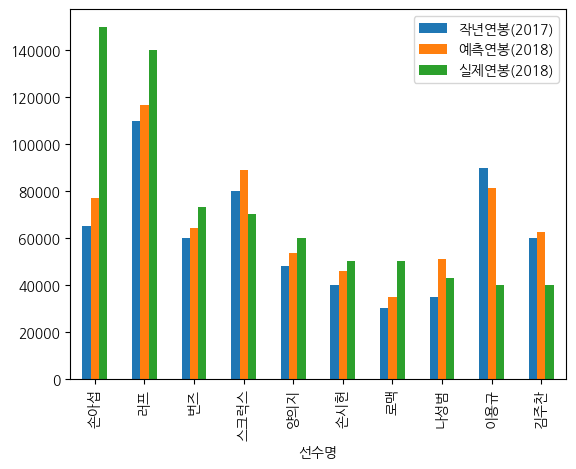

In [104]:
mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")